In [4]:
import numpy as np
import pandas as pd
df=pd.read_csv('carprices.csv')

In [8]:
df.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


In [10]:
dummies=pd.get_dummies(df[['Car Model']])

In [11]:
dummies

,Car Model_Audi A5,Car Model_BMW X5,Car Model_Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [16]:
merged = pd.concat([df,dummies],axis="columns")

In [17]:
merged

,Car Model,Mileage,Sell Price($),Age(yrs),Car Model_Audi A5,Car Model_BMW X5,Car Model_Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [26]:
final=merged.drop(['Car Model','Car Model_Mercedez Benz C class'],axis='columns')

In [27]:
final

,Mileage,Sell Price($),Age(yrs),Car Model_Audi A5,Car Model_BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [29]:
from sklearn.linear_model import LinearRegression as LR

In [30]:
reg=LR()

In [34]:
x=final.drop(['Sell Price($)'],axis="columns")
y=final[['Sell Price($)']]

In [35]:
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
reg.score(x,y)

0.9417050937281083

In [40]:
reg.coef_

array([[-3.70122094e-01, -1.33245363e+03, -2.45354074e+03,
        -6.73820733e+03]])

In [41]:
reg.intercept_

array([58976.62596854])

In [42]:
import matplotlib.pyplot as plt

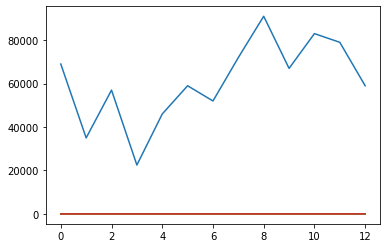

In [46]:
plt.plot(x)

In [75]:
from sklearn.preprocessing import LabelEncoder

In [76]:
le=LabelEncoder()

In [77]:
dfle=df

In [78]:
dfle[['Car Model']]= le.fit_transform(dfle[['Car Model']])

/home/digvijay/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: shape mismatch: value array of shape (13,) could not be broadcast to indexing result of shape (1,13)

In [79]:
dfle

,Car Model,Mileage,Sell Price($),Age(yrs)
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [80]:
x = dfle[['Car Model','Mileage','Age(yrs)']].values

In [81]:
x

array([[    1, 69000,     6],
       [    1, 35000,     3],
       [    1, 57000,     5],
       [    1, 22500,     2],
       [    1, 46000,     4],
       [    0, 59000,     5],
       [    0, 52000,     5],
       [    0, 72000,     6],
       [    0, 91000,     8],
       [    2, 67000,     6],
       [    2, 83000,     7],
       [    2, 79000,     7],
       [    2, 59000,     5]])

In [82]:
y=dfle['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [83]:
from sklearn.preprocessing import OneHotEncoder

In [84]:
ohe=OneHotEncoder(categorical_features=[0])

In [94]:
x=ohe.fit_transform(x).toarray()

/home/digvijay/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/home/digvijay/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [95]:
x

array([[0.00e+00, 1.00e+00, 0.00e+00, 6.90e+04, 6.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.50e+04, 3.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.70e+04, 5.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.25e+04, 2.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.60e+04, 4.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.90e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.20e+04, 5.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 7.20e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 0.00e+00, 9.10e+04, 8.00e+00],
       [1.00e+00, 0.00e+00, 1.00e+00, 6.70e+04, 6.00e+00],
       [1.00e+00, 0.00e+00, 1.00e+00, 8.30e+04, 7.00e+00],
       [1.00e+00, 0.00e+00, 1.00e+00, 7.90e+04, 7.00e+00],
       [1.00e+00, 0.00e+00, 1.00e+00, 5.90e+04, 5.00e+00]])

In [120]:
x=x[:,2:]

In [121]:
reg.fit(x,y)

ValueError: Found array with 0 feature(s) (shape=(13, 0)) while a minimum of 1 is required.

In [124]:
reg.score(x,y)

ValueError: Found array with 0 feature(s) (shape=(13, 0)) while a minimum of 1 is required.

In [123]:
reg.predict([[0,2,45000,7]])

ValueError: shapes (1,4) and (2,) not aligned: 4 (dim 1) != 2 (dim 0)

# OneHotEncoding Didnt go well!